### Preparation

In [1]:
import geopandas as gpd
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings

In [2]:
warnings.filterwarnings('ignore')

### Introduction

In this notebook we explore the Nemweb dispatch SCADA data from AEMO. The data is free to use for any purpose, when accurately and appropriately attributing AEMO as the author. The data we show here is retrived from the [Nemweb Archive](https://nemweb.com.au/Reports/Archive/) and comprises 5min wind power SCADA data from 2022 to 2023 for 75 Australian wind farms. According to the [documentation](https://www.aemo.com.au/energy-systems/electricity/national-electricity-market-nem/data-nem/market-data-nemweb), the values correspond to instantaneous MW reading from SCADA at the start of the dispatch interval.

### Load Data

In [3]:
datapath = 'C:/Users/ga84cip/LocalRepos/gnn_wind_power_forecasting/data/raw/aemo/'
figurepath = '../../reports/figures/aemo/'

In [38]:
df = pd.read_csv(f'{datapath}aemo_20222023.csv', index_col=0, parse_dates=True).sort_index(axis=1)
df = df.dropna(axis=1, how='all')

In [39]:
df

,ADPBA1G,ADPBA1L,ADPPV1,AGLHAL,AGLSOM,ANGAST1,ARWF1,AVLSF1,BALBG1,BALBL1,...,YAMBUKWF,YARANSF1,YARWUN_1,YATSF1,YENDWF1,YSWF1,YWPS1,YWPS2,YWPS3,YWPS4
SETTLEMENTDATE,,,,,,,,,,,,,,,,,,,,,
2022-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,15.4,NaN,NaN,NaN,...,6.1,NaN,NaN,NaN,17.01,0.0,NaN,NaN,NaN,NaN
2022-01-01 00:05:00,NaN,NaN,NaN,NaN,NaN,NaN,18.5,NaN,NaN,NaN,...,6.0,NaN,NaN,NaN,16.66,0.0,NaN,NaN,NaN,NaN
2022-01-01 00:10:00,NaN,NaN,NaN,NaN,NaN,NaN,22.8,NaN,NaN,NaN,...,6.5,NaN,NaN,NaN,16.95,0.0,NaN,NaN,NaN,NaN
2022-01-01 00:15:00,NaN,NaN,NaN,NaN,NaN,NaN,24.5,NaN,NaN,NaN,...,6.1,NaN,NaN,NaN,18.40,0.0,NaN,NaN,NaN,NaN
2022-01-01 00:20:00,NaN,NaN,NaN,NaN,NaN,NaN,24.6,NaN,NaN,NaN,...,5.5,NaN,NaN,NaN,20.48,0.0,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-12-31 23:35:00,0.000,0.111,0.0,0.0,0.0,-0.1,43.0,0.0,11.11,0.0,...,2.6,0.0,117.84000,0.0,24.34,1.9,249.36961,0.0,357.69495,357.13037
2023-12-31 23:40:00,4.868,0.000,0.0,0.0,0.0,-0.1,36.2,0.0,24.97,0.0,...,2.7,0.0,117.84000,0.0,33.57,1.9,250.12152,0.0,356.56583,359.67090
2023-12-31 23:45:00,5.985,0.000,0.0,0.0,0.0,-0.1,38.4,0.0,11.57,0.0,...,3.1,0.0,117.84000,0.0,37.93,2.0,248.36710,0.0,359.10632,358.54178


### Missing Values

In [40]:
# drop all columns with at least 1000 null values
null_counts = df.isnull().sum()
df.dropna(axis=1, thresh=len(df) - 1000, inplace=True)
print(f'{df.shape[1]} wind farms remain.')

67 wind farms remain.


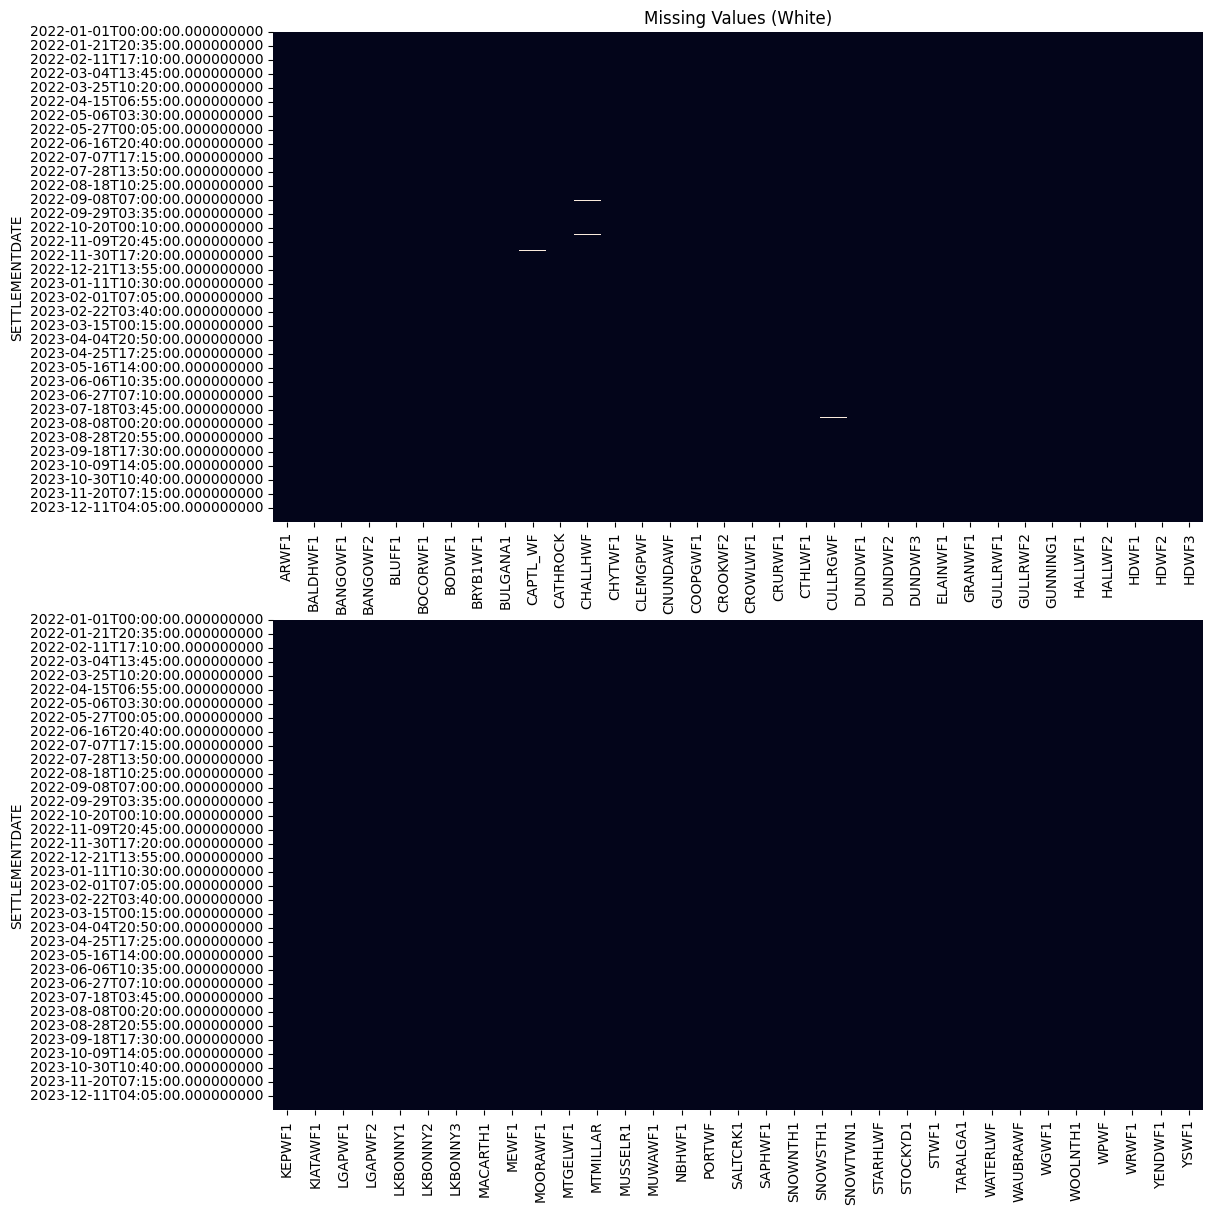

In [41]:
fig, axs = plt.subplots(2, 1, figsize=(12, 14))
sns.heatmap(df.iloc[:,:round(df.shape[1]/2)].isnull(), cbar=False, ax=axs[0])
sns.heatmap(df.iloc[:,round(df.shape[1]/2):].isnull(), cbar=False, ax=axs[1])
axs[0].set_title('Missing Values (White)')
plt.show()

In [42]:
# impute the remaining missing values with the corresponding previous value
df.fillna(method='ffill', inplace=True)

### Wind Power Readings

Here, we visualize the last 200 measurements for each wind farm in the data set.

In [43]:
n = df.shape[0]

In [44]:
round(df.shape[0]/6)

35040

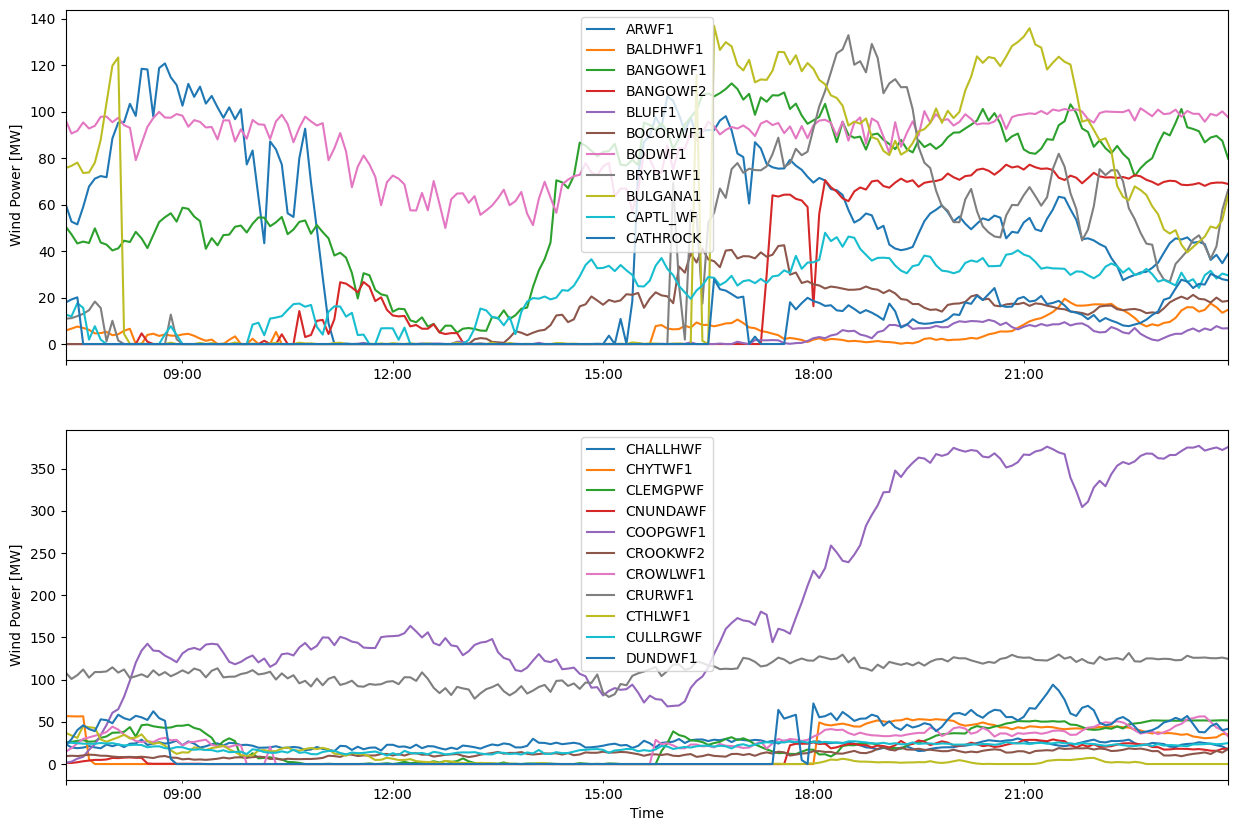

In [45]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
df.iloc[n-200:,:round(df.shape[1]/6)].plot(ax=axs[0])
df.iloc[n-200:,round(df.shape[1]/6):2*round(df.shape[1]/6)].plot(ax=axs[1])
axs[0].set_ylabel("Wind Power [MW]")
axs[1].set_ylabel("Wind Power [MW]")
axs[0].set_xlabel("")
axs[1].set_xlabel("Time")
plt.show()

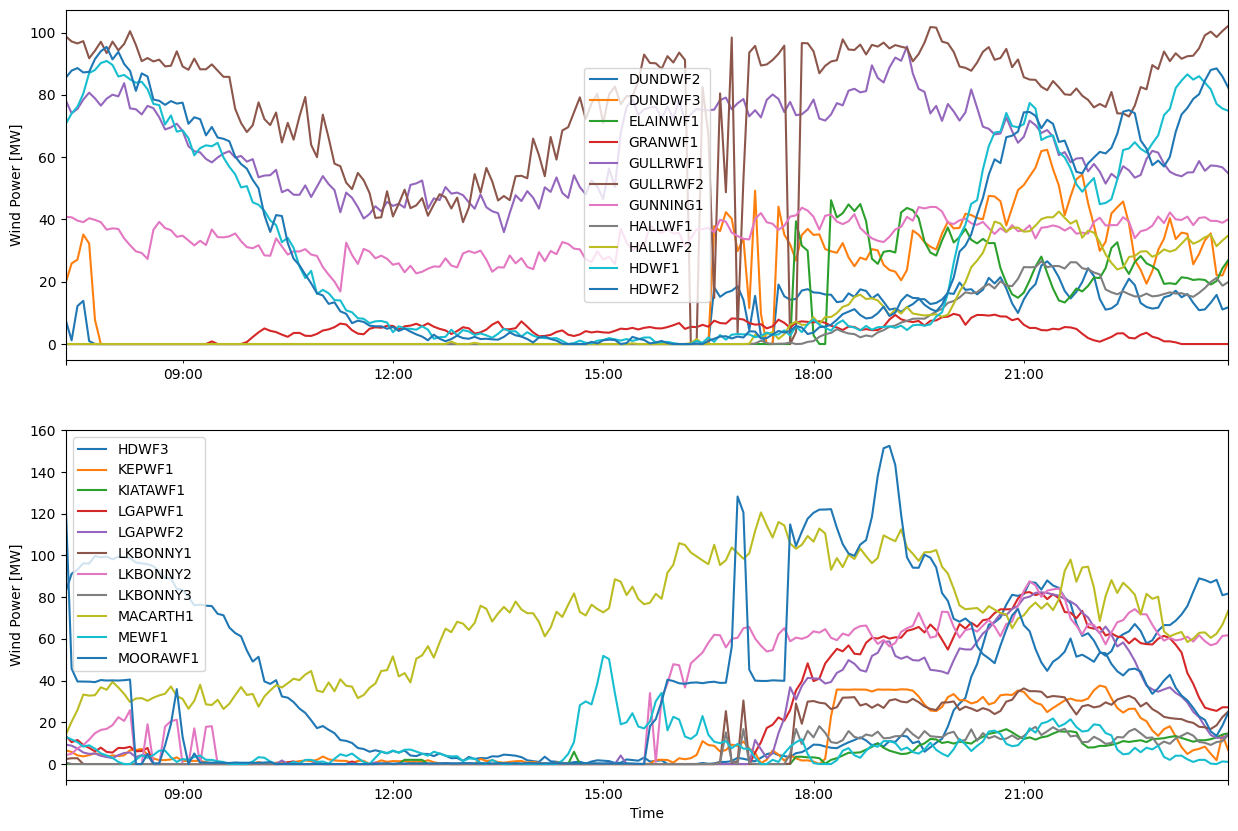

In [46]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
df.iloc[n-200:,2*round(df.shape[1]/6):3*round(df.shape[1]/6)].plot(ax=axs[0])
df.iloc[n-200:,3*round(df.shape[1]/6):4*round(df.shape[1]/6)].plot(ax=axs[1])
axs[0].set_ylabel("Wind Power [MW]")
axs[1].set_ylabel("Wind Power [MW]")
axs[0].set_xlabel("")
axs[1].set_xlabel("Time")
plt.show()

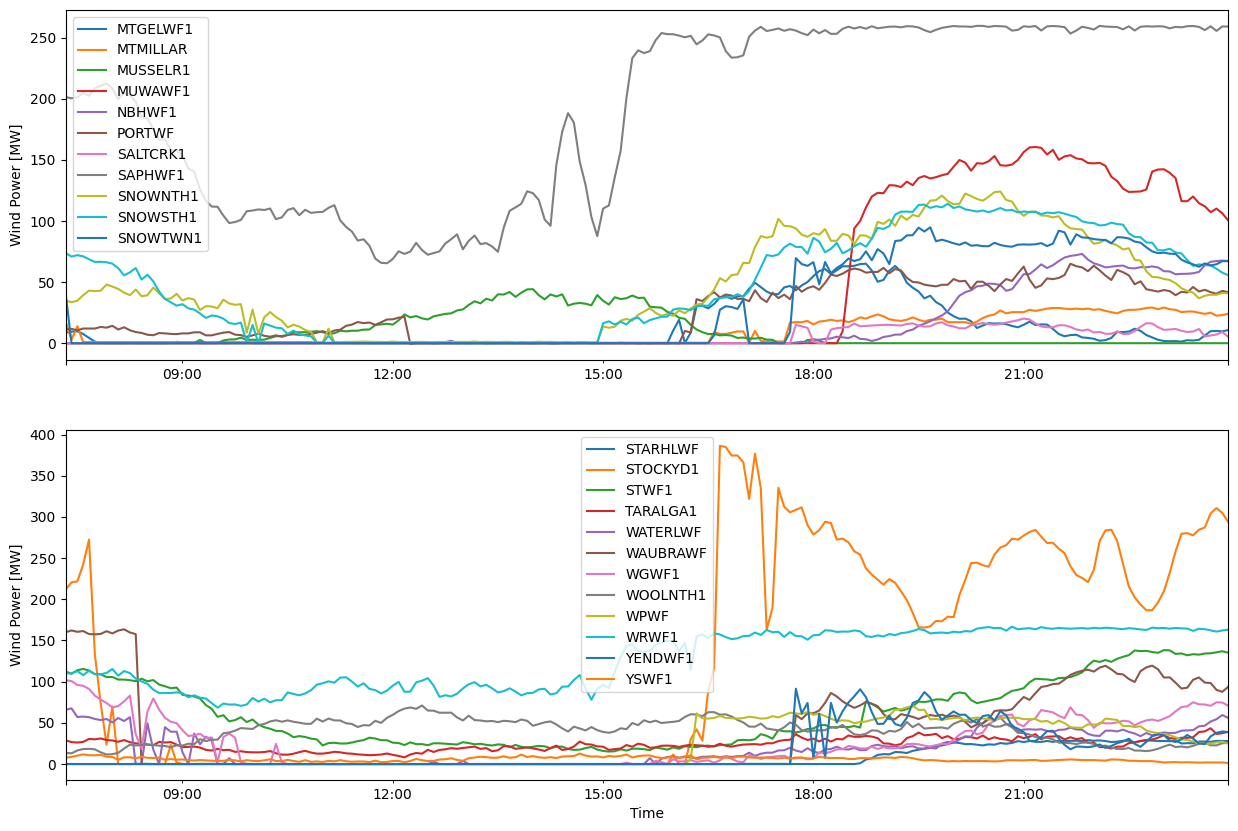

In [47]:
fig, axs = plt.subplots(2, 1, figsize=(15, 10))
df.iloc[n-200:,4*round(df.shape[1]/6):5*round(df.shape[1]/6)].plot(ax=axs[0])
df.iloc[n-200:,5*round(df.shape[1]/6):].plot(ax=axs[1])
axs[0].set_ylabel("Wind Power [MW]")
axs[1].set_ylabel("Wind Power [MW]")
axs[0].set_xlabel("")
axs[1].set_xlabel("Time")
plt.show()

$\rightarrow$ There are significant periods where 0MW is measured, which can be a challenge for modeling. For now, we will see whether the model is able to capture that behaviour by itself.

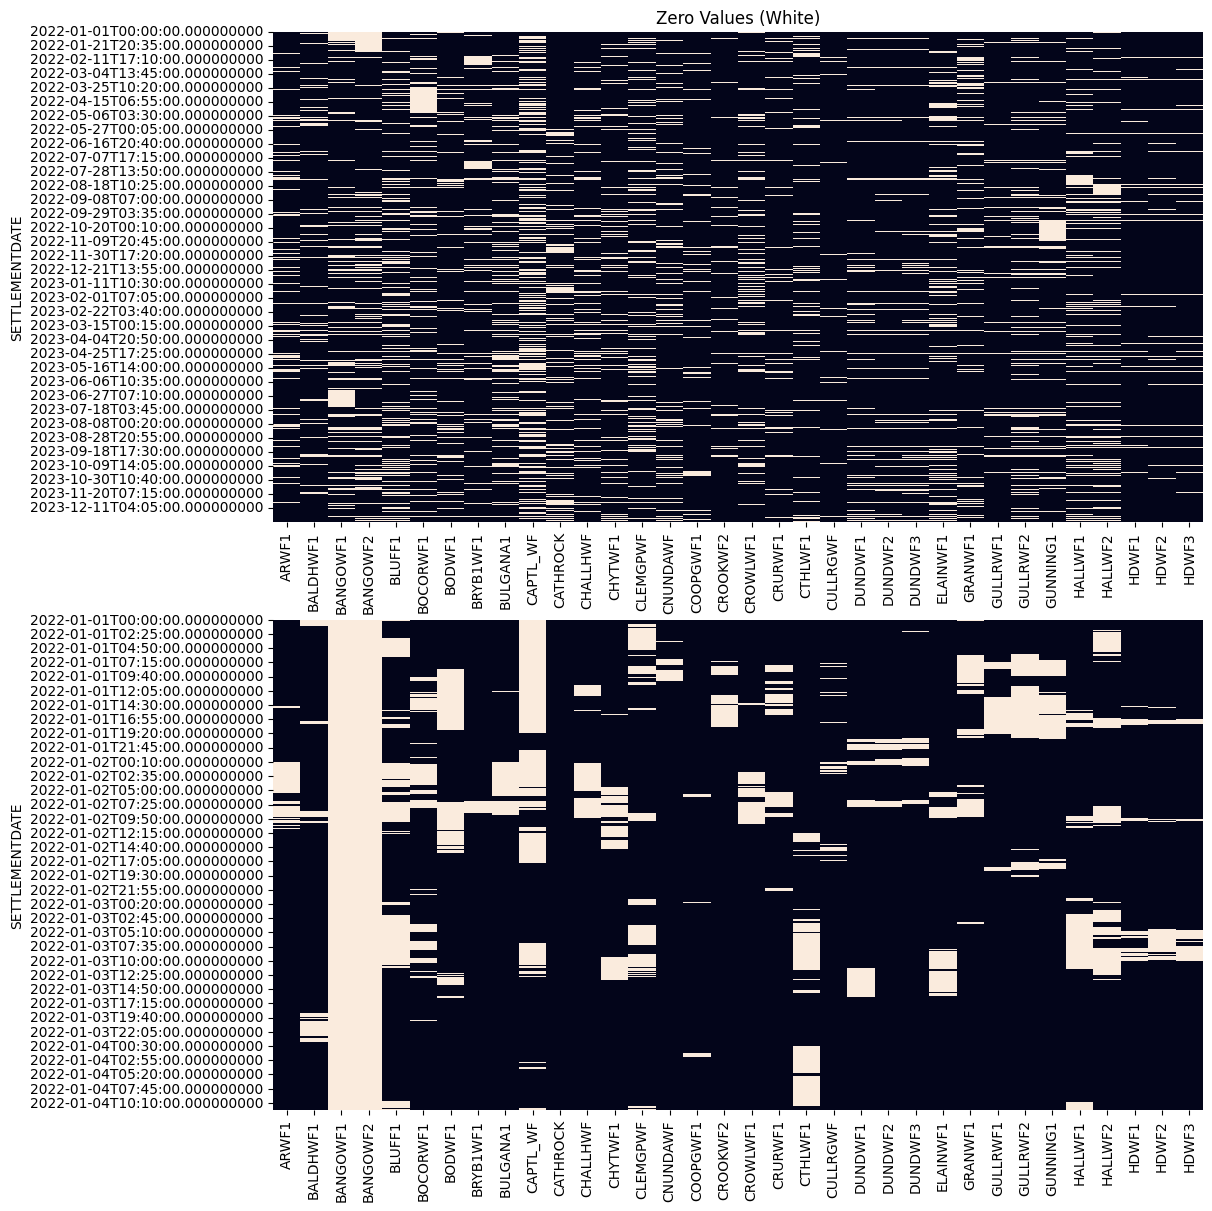

In [53]:
fig, axs = plt.subplots(2, 1, figsize=(12, 14))
sns.heatmap(df.iloc[:,:round(df.shape[1]/2)] == 0, cbar=False, ax=axs[0])
sns.heatmap(df.iloc[:1000,:round(df.shape[1]/2)] == 0, cbar=False, ax=axs[1])
axs[0].set_title('Zero Values (White)')
plt.show()

### Wind Farm Locations

In [73]:
df_loc = pd.read_excel(f'{datapath}locations_wind_farms.xlsx')

In [78]:
select = [df_loc['Abbreviation'].to_list()[i] in df.columns for i in range(df_loc.shape[0])]
df_loc = df_loc.iloc[select,:]

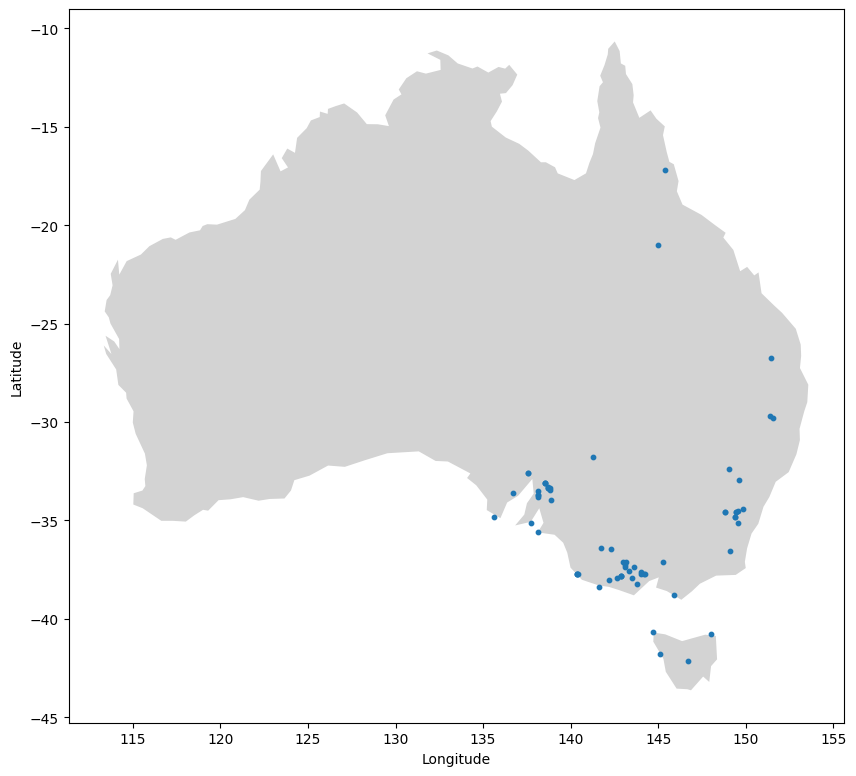

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))
countries = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
countries[countries["name"] == "Australia"].plot(color="lightgrey", ax=ax)
df_loc.plot(x="Longitude", y="Latitude", kind="scatter", s=10, ax=ax)
plt.show()

### Spatial Correlations

We are interested in how strongly the wind power production of several wind farms is correlated. Computing correlations on the raw data might give misleading results, as sometimes, individual wind farms produce 0MW because of maintenance, for example, and this would not reflect actual spatial correlation. Therefore, we compute the pearson correlation for each pair of wind farms, excluding time windows where at least one of the two wind farms measured MW = 0.

In [85]:
# Initialize an empty correlation matrix
corr_mat = np.array([[None]*df.shape[1]]*df.shape[1])

In [86]:
# Iterate over unique pairs of columns
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j:
            # Exclude rows with zeros in one of the two columns
            df_temp = df[[col1, col2]]
            df_cleaned = df_temp[(df_temp != 0).all(axis=1)]
            # Compute correlation
            corr_mat[i,j] = df_cleaned[col1].corr(df_cleaned[col2], method='pearson')
            corr_mat[j,i] = corr_mat[i,j]

In [87]:
# set diagonal values to 1 (self-correlation)
for i in range(corr_mat.shape[0]):
    corr_mat[i, i] = 1

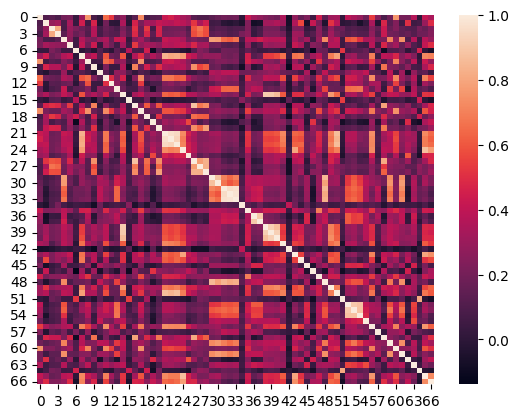

In [88]:
sns.heatmap(pd.DataFrame(corr_mat.astype(float)))
plt.show()

Let us check how many pairs have a correlation $\geq \rho$, where $\rho \in \{0.5, 0.6, 0.7, 0.8, 0.9\}$.

In [89]:
# Initialize lists to store the wind farm pairs
geq05 = []
geq06 = []
geq07 = []
geq08 = []
geq09 = []

# Iterate over unique pairs of columns
for i, col1 in enumerate(df.columns):
    for j, col2 in enumerate(df.columns):
        if i < j:
            if corr_mat[i,j] >= 0.5:
                geq05.append([col1, col2])
            if corr_mat[i,j] >= 0.6:
                geq06.append([col1, col2])
            if corr_mat[i,j] >= 0.7:
                geq07.append([col1, col2])
            if corr_mat[i,j] >= 0.8:
                geq08.append([col1, col2])
            if corr_mat[i,j] >= 0.9:
                geq09.append([col1, col2])

In [92]:
print(f"corr > 0.5 for {len(geq05)} wind farm pairs,")
print(f"corr > 0.6 for {len(geq06)} wind farms pairs,")
print(f"corr > 0.7 for {len(geq07)} wind farms pairs,")
print(f"corr > 0.8 for {len(geq08)} wind farms pairs,")
print(f"corr > 0.9 for {len(geq09)} wind farms pairs.")

corr > 0.5 for 303 wind farm pairs,
corr > 0.6 for 177 wind farms pairs,
corr > 0.7 for 89 wind farms pairs,
corr > 0.8 for 34 wind farms pairs,
corr > 0.9 for 10 wind farms pairs.


The pairs of wind farms with a particularly high correlation are:

In [93]:
print(geq09)

[['CNUNDAWF', 'LKBONNY1'], ['DUNDWF1', 'DUNDWF2'], ['DUNDWF1', 'DUNDWF3'], ['DUNDWF2', 'DUNDWF3'], ['HDWF1', 'HDWF2'], ['HDWF1', 'HDWF3'], ['HDWF2', 'HDWF3'], ['LKBONNY1', 'LKBONNY2'], ['LKBONNY2', 'LKBONNY3'], ['SNOWNTH1', 'SNOWSTH1']]


Let's look at these on the map:

In [94]:
# prepare list of highly correlated farms
highcorrfarms = []
for farmpair in geq09:
    if farmpair[0] not in highcorrfarms:
        highcorrfarms.append(farmpair[0])
    if farmpair[1] not in highcorrfarms:
        highcorrfarms.append(farmpair[1])
print(highcorrfarms)

['CNUNDAWF', 'LKBONNY1', 'DUNDWF1', 'DUNDWF2', 'DUNDWF3', 'HDWF1', 'HDWF2', 'HDWF3', 'LKBONNY2', 'LKBONNY3', 'SNOWNTH1', 'SNOWSTH1']


In [95]:
# extract these from df_loc:
df_loc_highcorr = df_loc[df_loc['Abbreviation'].isin(highcorrfarms)]

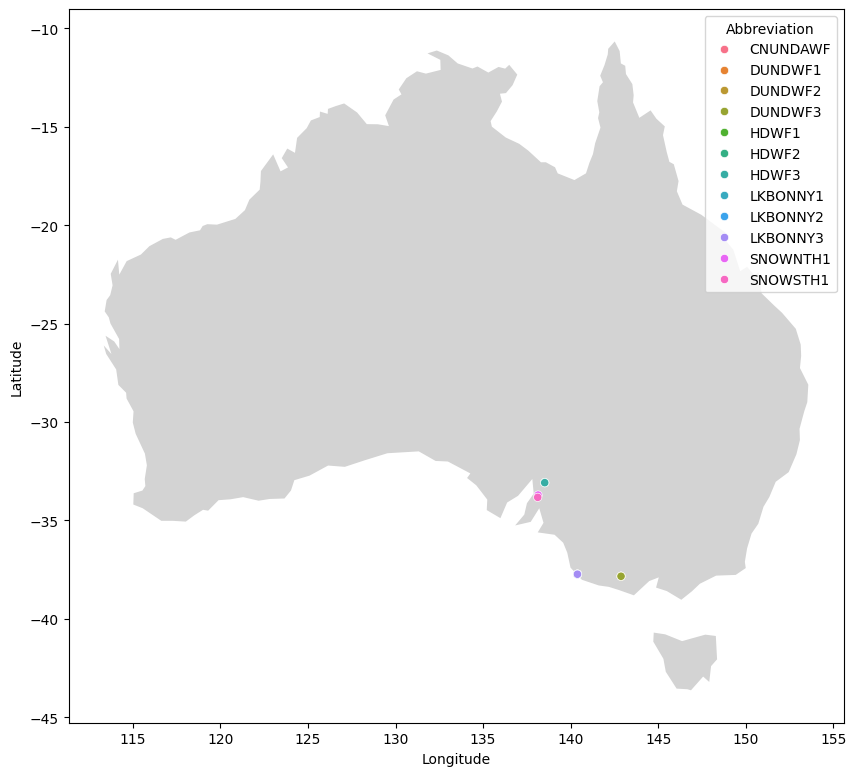

In [96]:
world = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))
fig, ax = plt.subplots(figsize=(10, 10))
world[world["name"] == "Australia"].plot(color="lightgrey", ax=ax)
sns.scatterplot(data=df_loc_highcorr, x='Longitude', y='Latitude', hue='Abbreviation', ax=ax)
plt.show()

In [97]:
df_loc_highcorr

,Abbreviation,Farm Name,Latitude,Longitude
15,CNUNDAWF,Canunda Wind Farm,-37.73400,140.39500
24,DUNDWF1,Dundonnell Wind Farm,-37.84122,142.87587
25,DUNDWF2,Dundonnell Wind Farm,-37.84122,142.87587
26,DUNDWF3,Dundonnell Wind Farm,-37.84122,142.87587
34,HDWF1,Hornsdale Wind Farm,-33.08587,138.51836
35,HDWF2,Hornsdale Wind Farm 2,-33.08587,138.51836
36,HDWF3,Hornsdale Wind Farm 3,-33.08587,138.51836
42,LKBONNY1,Lake Bonney Wind Farm Stage 1,-37.73784,140.38703
43,LKBONNY2,Lake Bonney Stage 2 Windfarm,-37.73784,140.38703
44,LKBONNY3,Lake Bonney Stage 3 Wind Farm,-37.73784,140.38703


$\rightarrow$ The LKBONNY farms are on the same spot, same for HDWF, DUNDWF farms. CNUNDAWF is very close to the LKBONNY farms. The SNOWSTH1 farms are very close to each other. This explains their high correlations.